# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/513817'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-01 22:50:41.217113: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 22:50:41.229260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 22:50:41.244500: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 22:50:41.249114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 22:50:41.260609: I tensorflow/core/platform/cpu_feature_guar

2024-10-01 22:50:44.093213: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "amazon", sample_size=100_000
)

Loading train tensors:   0%|          | 0/196 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/196 [00:00<01:46,  1.83it/s]

Loading train tensors:   1%|          | 2/196 [00:00<01:26,  2.24it/s]

Loading train tensors:   2%|▏         | 3/196 [00:04<05:42,  1.77s/it]

Loading train tensors:   2%|▏         | 4/196 [00:07<07:37,  2.38s/it]

Loading train tensors:   3%|▎         | 5/196 [00:10<08:41,  2.73s/it]

Loading train tensors:   3%|▎         | 6/196 [00:14<09:19,  2.95s/it]

Loading train tensors:   4%|▎         | 7/196 [00:17<09:47,  3.11s/it]

Loading train tensors:   4%|▍         | 8/196 [00:21<10:02,  3.21s/it]

Loading train tensors:   5%|▍         | 9/196 [00:24<10:13,  3.28s/it]

Loading train tensors:   5%|▌         | 10/196 [00:27<10:14,  3.30s/it]

Loading train tensors:   6%|▌         | 11/196 [00:28<07:39,  2.48s/it]

Loading train tensors:   6%|▌         | 12/196 [00:29<05:51,  1.91s/it]

Loading train tensors:   7%|▋         | 13/196 [00:29<04:36,  1.51s/it]

Loading train tensors:   7%|▋         | 14/196 [00:30<03:45,  1.24s/it]

Loading train tensors:   8%|▊         | 15/196 [00:30<03:09,  1.05s/it]

Loading train tensors:   8%|▊         | 16/196 [00:31<02:46,  1.08it/s]

Loading train tensors:   9%|▊         | 17/196 [00:32<02:39,  1.12it/s]

Loading train tensors:   9%|▉         | 18/196 [00:33<02:39,  1.12it/s]

Loading train tensors:  10%|▉         | 19/196 [00:34<02:39,  1.11it/s]

Loading train tensors:  10%|█         | 20/196 [00:35<02:37,  1.11it/s]

Loading train tensors:  11%|█         | 21/196 [00:38<04:51,  1.66s/it]

Loading train tensors:  11%|█         | 22/196 [00:42<06:25,  2.21s/it]

Loading train tensors:  12%|█▏        | 23/196 [00:45<07:28,  2.59s/it]

Loading train tensors:  12%|█▏        | 24/196 [00:49<08:19,  2.91s/it]

Loading train tensors:  13%|█▎        | 25/196 [00:52<08:46,  3.08s/it]

Loading train tensors:  13%|█▎        | 26/196 [00:56<09:02,  3.19s/it]

Loading train tensors:  14%|█▍        | 27/196 [00:59<09:20,  3.32s/it]

Loading train tensors:  14%|█▍        | 28/196 [01:03<09:23,  3.35s/it]

Loading train tensors:  15%|█▍        | 29/196 [01:06<09:26,  3.39s/it]

Loading train tensors:  15%|█▌        | 30/196 [01:10<09:29,  3.43s/it]

Loading train tensors:  16%|█▌        | 31/196 [01:13<09:25,  3.43s/it]

Loading train tensors:  16%|█▋        | 32/196 [01:16<09:18,  3.40s/it]

Loading train tensors:  17%|█▋        | 33/196 [01:20<09:13,  3.39s/it]

Loading train tensors:  17%|█▋        | 34/196 [01:23<09:08,  3.38s/it]

Loading train tensors:  18%|█▊        | 35/196 [01:27<09:03,  3.38s/it]

Loading train tensors:  18%|█▊        | 36/196 [01:30<08:56,  3.35s/it]

Loading train tensors:  19%|█▉        | 37/196 [01:33<08:47,  3.32s/it]

Loading train tensors:  19%|█▉        | 38/196 [01:36<08:48,  3.34s/it]

Loading train tensors:  20%|█▉        | 39/196 [01:40<08:36,  3.29s/it]

Loading train tensors:  20%|██        | 40/196 [01:43<08:27,  3.25s/it]

Loading train tensors:  21%|██        | 41/196 [01:46<08:23,  3.25s/it]

Loading train tensors:  21%|██▏       | 42/196 [01:49<08:18,  3.23s/it]

Loading train tensors:  22%|██▏       | 43/196 [01:52<08:12,  3.22s/it]

Loading train tensors:  22%|██▏       | 44/196 [01:56<08:14,  3.25s/it]

Loading train tensors:  23%|██▎       | 45/196 [01:59<08:12,  3.26s/it]

Loading train tensors:  23%|██▎       | 46/196 [02:02<08:09,  3.26s/it]

Loading train tensors:  24%|██▍       | 47/196 [02:06<08:11,  3.30s/it]

Loading train tensors:  24%|██▍       | 48/196 [02:09<08:12,  3.33s/it]

Loading train tensors:  25%|██▌       | 49/196 [02:12<08:07,  3.32s/it]

Loading train tensors:  26%|██▌       | 50/196 [02:16<08:06,  3.34s/it]

Loading train tensors:  26%|██▌       | 51/196 [02:19<07:58,  3.30s/it]

Loading train tensors:  27%|██▋       | 52/196 [02:22<07:57,  3.32s/it]

Loading train tensors:  27%|██▋       | 53/196 [02:26<08:01,  3.37s/it]

Loading train tensors:  28%|██▊       | 54/196 [02:29<07:59,  3.37s/it]

Loading train tensors:  28%|██▊       | 55/196 [02:33<08:00,  3.41s/it]

Loading train tensors:  29%|██▊       | 56/196 [02:36<07:58,  3.42s/it]

Loading train tensors:  29%|██▉       | 57/196 [02:40<07:54,  3.41s/it]

Loading train tensors:  30%|██▉       | 58/196 [02:43<07:50,  3.41s/it]

Loading train tensors:  30%|███       | 59/196 [02:46<07:48,  3.42s/it]

Loading train tensors:  31%|███       | 60/196 [02:50<07:51,  3.47s/it]

Loading train tensors:  31%|███       | 61/196 [02:54<07:51,  3.49s/it]

Loading train tensors:  32%|███▏      | 62/196 [02:57<07:45,  3.48s/it]

Loading train tensors:  32%|███▏      | 63/196 [03:00<07:37,  3.44s/it]

Loading train tensors:  33%|███▎      | 64/196 [03:04<07:34,  3.45s/it]

Loading train tensors:  33%|███▎      | 65/196 [03:07<07:28,  3.42s/it]

Loading train tensors:  34%|███▎      | 66/196 [03:11<07:27,  3.45s/it]

Loading train tensors:  34%|███▍      | 67/196 [03:14<07:24,  3.45s/it]

Loading train tensors:  35%|███▍      | 68/196 [03:17<07:18,  3.42s/it]

Loading train tensors:  35%|███▌      | 69/196 [03:21<07:19,  3.46s/it]

Loading train tensors:  36%|███▌      | 70/196 [03:25<07:16,  3.47s/it]

Loading train tensors:  36%|███▌      | 71/196 [03:28<07:12,  3.46s/it]

Loading train tensors:  37%|███▋      | 72/196 [03:31<07:09,  3.46s/it]

Loading train tensors:  37%|███▋      | 73/196 [03:35<07:04,  3.45s/it]

Loading train tensors:  38%|███▊      | 74/196 [03:38<07:01,  3.46s/it]

Loading train tensors:  38%|███▊      | 75/196 [03:42<06:58,  3.46s/it]

Loading train tensors:  39%|███▉      | 76/196 [03:45<06:50,  3.42s/it]

Loading train tensors:  39%|███▉      | 77/196 [03:48<06:44,  3.40s/it]

Loading train tensors:  40%|███▉      | 78/196 [03:52<06:41,  3.40s/it]

Loading train tensors:  40%|████      | 79/196 [03:55<06:36,  3.39s/it]

Loading train tensors:  41%|████      | 80/196 [03:59<06:40,  3.45s/it]

Loading train tensors:  41%|████▏     | 81/196 [04:02<06:35,  3.44s/it]

Loading train tensors:  42%|████▏     | 82/196 [04:06<06:31,  3.43s/it]

Loading train tensors:  42%|████▏     | 83/196 [04:09<06:31,  3.47s/it]

Loading train tensors:  43%|████▎     | 84/196 [04:13<06:25,  3.44s/it]

Loading train tensors:  43%|████▎     | 85/196 [04:16<06:18,  3.41s/it]

Loading train tensors:  44%|████▍     | 86/196 [04:19<06:14,  3.41s/it]

Loading train tensors:  44%|████▍     | 87/196 [04:23<06:08,  3.38s/it]

Loading train tensors:  45%|████▍     | 88/196 [04:26<06:07,  3.40s/it]

Loading train tensors:  45%|████▌     | 89/196 [04:30<06:04,  3.41s/it]

Loading train tensors:  46%|████▌     | 90/196 [04:33<05:57,  3.37s/it]

Loading train tensors:  46%|████▋     | 91/196 [04:36<05:52,  3.36s/it]

Loading train tensors:  47%|████▋     | 92/196 [04:39<05:49,  3.36s/it]

Loading train tensors:  47%|████▋     | 93/196 [04:43<05:45,  3.35s/it]

Loading train tensors:  48%|████▊     | 94/196 [04:46<05:42,  3.36s/it]

Loading train tensors:  48%|████▊     | 95/196 [04:50<05:39,  3.37s/it]

Loading train tensors:  49%|████▉     | 96/196 [04:53<05:36,  3.36s/it]

Loading train tensors:  49%|████▉     | 97/196 [04:56<05:35,  3.38s/it]

Loading train tensors:  50%|█████     | 98/196 [05:00<05:36,  3.43s/it]

Loading train tensors:  51%|█████     | 99/196 [05:03<05:31,  3.42s/it]

Loading train tensors:  51%|█████     | 100/196 [05:07<05:24,  3.38s/it]

Loading train tensors:  52%|█████▏    | 101/196 [05:07<04:04,  2.58s/it]

Loading train tensors:  52%|█████▏    | 102/196 [05:08<03:08,  2.01s/it]

Loading train tensors:  53%|█████▎    | 103/196 [05:09<02:28,  1.60s/it]

Loading train tensors:  53%|█████▎    | 104/196 [05:09<02:01,  1.32s/it]

Loading train tensors:  54%|█████▎    | 105/196 [05:10<01:41,  1.12s/it]

Loading train tensors:  54%|█████▍    | 106/196 [05:11<01:28,  1.01it/s]

Loading train tensors:  55%|█████▍    | 107/196 [05:11<01:18,  1.14it/s]

Loading train tensors:  55%|█████▌    | 108/196 [05:12<01:11,  1.23it/s]

Loading train tensors:  56%|█████▌    | 109/196 [05:13<01:06,  1.30it/s]

Loading train tensors:  56%|█████▌    | 110/196 [05:13<01:01,  1.39it/s]

Loading train tensors:  57%|█████▋    | 111/196 [05:14<00:58,  1.46it/s]

Loading train tensors:  57%|█████▋    | 112/196 [05:14<00:55,  1.52it/s]

Loading train tensors:  58%|█████▊    | 113/196 [05:15<00:54,  1.54it/s]

Loading train tensors:  58%|█████▊    | 114/196 [05:16<00:52,  1.55it/s]

Loading train tensors:  59%|█████▊    | 115/196 [05:16<00:50,  1.59it/s]

Loading train tensors:  59%|█████▉    | 116/196 [05:17<00:51,  1.55it/s]

Loading train tensors:  60%|█████▉    | 117/196 [05:18<00:50,  1.57it/s]

Loading train tensors:  60%|██████    | 118/196 [05:18<00:49,  1.56it/s]

Loading train tensors:  61%|██████    | 119/196 [05:19<00:48,  1.60it/s]

Loading train tensors:  61%|██████    | 120/196 [05:19<00:46,  1.63it/s]

Loading train tensors:  62%|██████▏   | 121/196 [05:20<00:48,  1.53it/s]

Loading train tensors:  62%|██████▏   | 122/196 [05:21<00:46,  1.57it/s]

Loading train tensors:  63%|██████▎   | 123/196 [05:21<00:45,  1.62it/s]

Loading train tensors:  63%|██████▎   | 124/196 [05:22<00:43,  1.65it/s]

Loading train tensors:  64%|██████▍   | 125/196 [05:22<00:42,  1.67it/s]

Loading train tensors:  64%|██████▍   | 126/196 [05:23<00:41,  1.69it/s]

Loading train tensors:  65%|██████▍   | 127/196 [05:24<00:42,  1.62it/s]

Loading train tensors:  65%|██████▌   | 128/196 [05:24<00:41,  1.65it/s]

Loading train tensors:  66%|██████▌   | 129/196 [05:25<00:40,  1.65it/s]

Loading train tensors:  66%|██████▋   | 130/196 [05:25<00:40,  1.65it/s]

Loading train tensors:  67%|██████▋   | 131/196 [05:26<00:39,  1.65it/s]

Loading train tensors:  67%|██████▋   | 132/196 [05:27<00:40,  1.58it/s]

Loading train tensors:  68%|██████▊   | 133/196 [05:27<00:40,  1.56it/s]

Loading train tensors:  68%|██████▊   | 134/196 [05:28<00:40,  1.54it/s]

Loading train tensors:  69%|██████▉   | 135/196 [05:29<00:38,  1.59it/s]

Loading train tensors:  69%|██████▉   | 136/196 [05:29<00:37,  1.61it/s]

Loading train tensors:  70%|██████▉   | 137/196 [05:30<00:36,  1.61it/s]

Loading train tensors:  70%|███████   | 138/196 [05:31<00:35,  1.61it/s]

Loading train tensors:  71%|███████   | 139/196 [05:31<00:35,  1.61it/s]

Loading train tensors:  71%|███████▏  | 140/196 [05:32<00:35,  1.57it/s]

Loading train tensors:  72%|███████▏  | 141/196 [05:32<00:34,  1.58it/s]

Loading train tensors:  72%|███████▏  | 142/196 [05:33<00:33,  1.60it/s]

Loading train tensors:  73%|███████▎  | 143/196 [05:34<00:32,  1.63it/s]

Loading train tensors:  73%|███████▎  | 144/196 [05:34<00:31,  1.64it/s]

Loading train tensors:  74%|███████▍  | 145/196 [05:35<00:30,  1.66it/s]

Loading train tensors:  74%|███████▍  | 146/196 [05:35<00:29,  1.67it/s]

Loading train tensors:  75%|███████▌  | 147/196 [05:36<00:28,  1.69it/s]

Loading train tensors:  76%|███████▌  | 148/196 [05:37<00:28,  1.70it/s]

Loading train tensors:  76%|███████▌  | 149/196 [05:39<00:48,  1.02s/it]

Loading train tensors:  77%|███████▋  | 150/196 [05:42<01:19,  1.73s/it]

Loading train tensors:  77%|███████▋  | 151/196 [05:45<01:39,  2.22s/it]

Loading train tensors:  78%|███████▊  | 152/196 [05:49<01:52,  2.56s/it]

Loading train tensors:  78%|███████▊  | 153/196 [05:52<02:01,  2.84s/it]

Loading train tensors:  79%|███████▊  | 154/196 [05:56<02:05,  2.99s/it]

Loading train tensors:  79%|███████▉  | 155/196 [05:59<02:07,  3.10s/it]

Loading train tensors:  80%|███████▉  | 156/196 [06:02<02:08,  3.21s/it]

Loading train tensors:  80%|████████  | 157/196 [06:06<02:06,  3.26s/it]

Loading train tensors:  81%|████████  | 158/196 [06:09<02:03,  3.24s/it]

Loading train tensors:  81%|████████  | 159/196 [06:12<02:02,  3.30s/it]

Loading train tensors:  82%|████████▏ | 160/196 [06:16<01:57,  3.26s/it]

Loading train tensors:  82%|████████▏ | 161/196 [06:19<01:55,  3.30s/it]

Loading train tensors:  83%|████████▎ | 162/196 [06:22<01:52,  3.30s/it]

Loading train tensors:  83%|████████▎ | 163/196 [06:25<01:47,  3.26s/it]

Loading train tensors:  84%|████████▎ | 164/196 [06:29<01:44,  3.25s/it]

Loading train tensors:  84%|████████▍ | 165/196 [06:32<01:40,  3.25s/it]

Loading train tensors:  85%|████████▍ | 166/196 [06:35<01:36,  3.23s/it]

Loading train tensors:  85%|████████▌ | 167/196 [06:38<01:33,  3.23s/it]

Loading train tensors:  86%|████████▌ | 168/196 [06:42<01:30,  3.24s/it]

Loading train tensors:  86%|████████▌ | 169/196 [06:45<01:26,  3.20s/it]

Loading train tensors:  87%|████████▋ | 170/196 [06:48<01:23,  3.22s/it]

Loading train tensors:  87%|████████▋ | 171/196 [06:51<01:20,  3.24s/it]

Loading train tensors:  88%|████████▊ | 172/196 [06:54<01:17,  3.22s/it]

Loading train tensors:  88%|████████▊ | 173/196 [06:58<01:14,  3.23s/it]

Loading train tensors:  89%|████████▉ | 174/196 [07:01<01:11,  3.24s/it]

Loading train tensors:  89%|████████▉ | 175/196 [07:04<01:07,  3.23s/it]

Loading train tensors:  90%|████████▉ | 176/196 [07:07<01:04,  3.21s/it]

Loading train tensors:  90%|█████████ | 177/196 [07:10<01:01,  3.22s/it]

Loading train tensors:  91%|█████████ | 178/196 [07:14<00:57,  3.20s/it]

Loading train tensors:  91%|█████████▏| 179/196 [07:17<00:54,  3.18s/it]

Loading train tensors:  92%|█████████▏| 180/196 [07:20<00:51,  3.22s/it]

Loading train tensors:  92%|█████████▏| 181/196 [07:23<00:48,  3.21s/it]

Loading train tensors:  93%|█████████▎| 182/196 [07:26<00:44,  3.19s/it]

Loading train tensors:  93%|█████████▎| 183/196 [07:30<00:42,  3.23s/it]

Loading train tensors:  94%|█████████▍| 184/196 [07:33<00:38,  3.22s/it]

Loading train tensors:  94%|█████████▍| 185/196 [07:36<00:35,  3.22s/it]

Loading train tensors:  95%|█████████▍| 186/196 [07:40<00:32,  3.25s/it]

Loading train tensors:  95%|█████████▌| 187/196 [07:43<00:29,  3.24s/it]

Loading train tensors:  96%|█████████▌| 188/196 [07:46<00:25,  3.22s/it]

Loading train tensors:  96%|█████████▋| 189/196 [07:49<00:22,  3.26s/it]

Loading train tensors:  97%|█████████▋| 190/196 [07:52<00:19,  3.24s/it]

Loading train tensors:  97%|█████████▋| 191/196 [07:56<00:16,  3.22s/it]

Loading train tensors:  98%|█████████▊| 192/196 [07:59<00:13,  3.30s/it]

Loading train tensors:  98%|█████████▊| 193/196 [08:02<00:09,  3.26s/it]

Loading train tensors:  99%|█████████▉| 194/196 [08:06<00:06,  3.26s/it]

Loading train tensors:  99%|█████████▉| 195/196 [08:09<00:03,  3.20s/it]

Loading train tensors: 100%|██████████| 196/196 [08:10<00:00,  2.54s/it]

Loading train tensors: 100%|██████████| 196/196 [08:10<00:00,  2.50s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/196 [00:00<?, ?it/s]

Loading val tensors:   1%|          | 1/196 [00:03<11:36,  3.57s/it]

Loading val tensors:   1%|          | 2/196 [00:07<11:29,  3.55s/it]

Loading val tensors:   2%|▏         | 3/196 [00:10<11:21,  3.53s/it]

Loading val tensors:   2%|▏         | 4/196 [00:14<11:29,  3.59s/it]

Loading val tensors:   3%|▎         | 5/196 [00:17<11:27,  3.60s/it]

Loading val tensors:   3%|▎         | 6/196 [00:21<11:19,  3.58s/it]

Loading val tensors:   4%|▎         | 7/196 [00:25<11:17,  3.58s/it]

Loading val tensors:   4%|▍         | 8/196 [00:28<11:14,  3.59s/it]

Loading val tensors:   5%|▍         | 9/196 [00:32<11:16,  3.62s/it]

Loading val tensors:   5%|▌         | 10/196 [00:35<11:15,  3.63s/it]

Loading val tensors:   6%|▌         | 11/196 [00:39<11:10,  3.62s/it]

Loading val tensors:   6%|▌         | 12/196 [00:43<11:14,  3.66s/it]

Loading val tensors:   7%|▋         | 13/196 [00:47<11:11,  3.67s/it]

Loading val tensors:   7%|▋         | 14/196 [00:50<11:10,  3.68s/it]

Loading val tensors:   8%|▊         | 15/196 [00:54<11:15,  3.73s/it]

Loading val tensors:   8%|▊         | 16/196 [00:58<11:08,  3.71s/it]

Loading val tensors:   9%|▊         | 17/196 [01:02<11:08,  3.73s/it]

Loading val tensors:   9%|▉         | 18/196 [01:05<11:04,  3.73s/it]

Loading val tensors:  10%|▉         | 19/196 [01:09<10:59,  3.72s/it]

Loading val tensors:  10%|█         | 20/196 [01:13<11:00,  3.75s/it]

Loading val tensors:  11%|█         | 21/196 [01:16<10:53,  3.73s/it]

Loading val tensors:  11%|█         | 22/196 [01:20<10:50,  3.74s/it]

Loading val tensors:  12%|█▏        | 23/196 [01:24<10:49,  3.75s/it]

Loading val tensors:  12%|█▏        | 24/196 [01:28<10:45,  3.75s/it]

Loading val tensors:  13%|█▎        | 25/196 [01:32<10:42,  3.76s/it]

Loading val tensors:  13%|█▎        | 26/196 [01:35<10:35,  3.74s/it]

Loading val tensors:  14%|█▍        | 27/196 [01:39<10:30,  3.73s/it]

Loading val tensors:  14%|█▍        | 28/196 [01:43<10:33,  3.77s/it]

Loading val tensors:  15%|█▍        | 29/196 [01:47<10:28,  3.76s/it]

Loading val tensors:  15%|█▌        | 30/196 [01:50<10:12,  3.69s/it]

Loading val tensors:  16%|█▌        | 31/196 [01:54<10:02,  3.65s/it]

Loading val tensors:  16%|█▋        | 32/196 [01:57<09:56,  3.64s/it]

Loading val tensors:  17%|█▋        | 33/196 [02:01<10:02,  3.70s/it]

Loading val tensors:  17%|█▋        | 34/196 [02:05<09:55,  3.68s/it]

Loading val tensors:  18%|█▊        | 35/196 [02:08<09:44,  3.63s/it]

Loading val tensors:  18%|█▊        | 36/196 [02:12<09:44,  3.65s/it]

Loading val tensors:  19%|█▉        | 37/196 [02:15<09:33,  3.61s/it]

Loading val tensors:  19%|█▉        | 38/196 [02:19<09:31,  3.61s/it]

Loading val tensors:  20%|█▉        | 39/196 [02:23<09:29,  3.63s/it]

Loading val tensors:  20%|██        | 40/196 [02:26<09:25,  3.63s/it]

Loading val tensors:  21%|██        | 41/196 [02:30<09:26,  3.65s/it]

Loading val tensors:  21%|██▏       | 42/196 [02:34<09:18,  3.63s/it]

Loading val tensors:  22%|██▏       | 43/196 [02:37<09:14,  3.62s/it]

Loading val tensors:  22%|██▏       | 44/196 [02:41<09:09,  3.62s/it]

Loading val tensors:  23%|██▎       | 45/196 [02:44<09:02,  3.59s/it]

Loading val tensors:  23%|██▎       | 46/196 [02:48<09:06,  3.64s/it]

Loading val tensors:  24%|██▍       | 47/196 [02:52<08:57,  3.61s/it]

Loading val tensors:  24%|██▍       | 48/196 [02:55<08:52,  3.60s/it]

Loading val tensors:  25%|██▌       | 49/196 [02:59<08:49,  3.60s/it]

Loading val tensors:  26%|██▌       | 50/196 [03:02<08:42,  3.58s/it]

Loading val tensors:  26%|██▌       | 51/196 [03:06<08:39,  3.58s/it]

Loading val tensors:  27%|██▋       | 52/196 [03:10<08:38,  3.60s/it]

Loading val tensors:  27%|██▋       | 53/196 [03:13<08:29,  3.56s/it]

Loading val tensors:  28%|██▊       | 54/196 [03:17<08:26,  3.57s/it]

Loading val tensors:  28%|██▊       | 55/196 [03:20<08:20,  3.55s/it]

Loading val tensors:  29%|██▊       | 56/196 [03:24<08:13,  3.52s/it]

Loading val tensors:  29%|██▉       | 57/196 [03:27<08:11,  3.54s/it]

Loading val tensors:  30%|██▉       | 58/196 [03:31<08:03,  3.51s/it]

Loading val tensors:  30%|███       | 59/196 [03:34<07:53,  3.46s/it]

Loading val tensors:  31%|███       | 60/196 [03:37<07:49,  3.45s/it]

Loading val tensors:  31%|███       | 61/196 [03:41<07:42,  3.42s/it]

Loading val tensors:  32%|███▏      | 62/196 [03:44<07:39,  3.43s/it]

Loading val tensors:  32%|███▏      | 63/196 [03:48<07:39,  3.45s/it]

Loading val tensors:  33%|███▎      | 64/196 [03:51<07:38,  3.47s/it]

Loading val tensors:  33%|███▎      | 65/196 [03:55<07:39,  3.51s/it]

Loading val tensors:  34%|███▎      | 66/196 [03:58<07:37,  3.52s/it]

Loading val tensors:  34%|███▍      | 67/196 [04:02<07:34,  3.52s/it]

Loading val tensors:  35%|███▍      | 68/196 [04:06<07:34,  3.55s/it]

Loading val tensors:  35%|███▌      | 69/196 [04:09<07:27,  3.52s/it]

Loading val tensors:  36%|███▌      | 70/196 [04:13<07:23,  3.52s/it]

Loading val tensors:  36%|███▌      | 71/196 [04:16<07:17,  3.50s/it]

Loading val tensors:  37%|███▋      | 72/196 [04:19<07:14,  3.51s/it]

Loading val tensors:  37%|███▋      | 73/196 [04:23<07:12,  3.52s/it]

Loading val tensors:  38%|███▊      | 74/196 [04:27<07:11,  3.54s/it]

Loading val tensors:  38%|███▊      | 75/196 [04:30<07:04,  3.51s/it]

Loading val tensors:  39%|███▉      | 76/196 [04:34<07:06,  3.55s/it]

Loading val tensors:  39%|███▉      | 77/196 [04:37<07:04,  3.57s/it]

Loading val tensors:  40%|███▉      | 78/196 [04:41<06:59,  3.55s/it]

Loading val tensors:  40%|████      | 79/196 [04:44<06:56,  3.56s/it]

Loading val tensors:  41%|████      | 80/196 [04:48<06:49,  3.53s/it]

Loading val tensors:  41%|████▏     | 81/196 [04:51<06:46,  3.54s/it]

Loading val tensors:  42%|████▏     | 82/196 [04:55<06:41,  3.52s/it]

Loading val tensors:  42%|████▏     | 83/196 [04:58<06:37,  3.51s/it]

Loading val tensors:  43%|████▎     | 84/196 [05:02<06:36,  3.54s/it]

Loading val tensors:  43%|████▎     | 85/196 [05:06<06:31,  3.53s/it]

Loading val tensors:  44%|████▍     | 86/196 [05:09<06:29,  3.54s/it]

Loading val tensors:  44%|████▍     | 87/196 [05:13<06:29,  3.58s/it]

Loading val tensors:  45%|████▍     | 88/196 [05:16<06:26,  3.58s/it]

Loading val tensors:  45%|████▌     | 89/196 [05:20<06:26,  3.61s/it]

Loading val tensors:  46%|████▌     | 90/196 [05:24<06:23,  3.62s/it]

Loading val tensors:  46%|████▋     | 91/196 [05:27<06:16,  3.59s/it]

Loading val tensors:  47%|████▋     | 92/196 [05:31<06:13,  3.60s/it]

Loading val tensors:  47%|████▋     | 93/196 [05:34<06:07,  3.57s/it]

Loading val tensors:  48%|████▊     | 94/196 [05:38<06:04,  3.58s/it]

Loading val tensors:  48%|████▊     | 95/196 [05:41<06:01,  3.58s/it]

Loading val tensors:  49%|████▉     | 96/196 [05:45<05:55,  3.56s/it]

Loading val tensors:  49%|████▉     | 97/196 [05:49<05:54,  3.58s/it]

Loading val tensors:  50%|█████     | 98/196 [05:52<05:49,  3.56s/it]

Loading val tensors:  51%|█████     | 99/196 [05:56<05:47,  3.58s/it]

Loading val tensors:  51%|█████     | 100/196 [05:59<05:45,  3.60s/it]

Loading val tensors:  52%|█████▏    | 101/196 [06:03<05:40,  3.58s/it]

Loading val tensors:  52%|█████▏    | 102/196 [06:07<05:37,  3.59s/it]

Loading val tensors:  53%|█████▎    | 103/196 [06:10<05:36,  3.62s/it]

Loading val tensors:  53%|█████▎    | 104/196 [06:14<05:33,  3.62s/it]

Loading val tensors:  54%|█████▎    | 105/196 [06:17<05:29,  3.62s/it]

Loading val tensors:  54%|█████▍    | 106/196 [06:21<05:22,  3.58s/it]

Loading val tensors:  55%|█████▍    | 107/196 [06:24<05:16,  3.55s/it]

Loading val tensors:  55%|█████▌    | 108/196 [06:28<05:13,  3.57s/it]

Loading val tensors:  56%|█████▌    | 109/196 [06:32<05:08,  3.55s/it]

Loading val tensors:  56%|█████▌    | 110/196 [06:35<05:03,  3.53s/it]

Loading val tensors:  57%|█████▋    | 111/196 [06:39<05:02,  3.56s/it]

Loading val tensors:  57%|█████▋    | 112/196 [06:42<04:56,  3.53s/it]

Loading val tensors:  58%|█████▊    | 113/196 [06:46<04:51,  3.51s/it]

Loading val tensors:  58%|█████▊    | 114/196 [06:49<04:48,  3.52s/it]

Loading val tensors:  59%|█████▊    | 115/196 [06:53<04:43,  3.50s/it]

Loading val tensors:  59%|█████▉    | 116/196 [06:56<04:41,  3.52s/it]

Loading val tensors:  60%|█████▉    | 117/196 [07:00<04:35,  3.49s/it]

Loading val tensors:  60%|██████    | 118/196 [07:03<04:31,  3.48s/it]

Loading val tensors:  61%|██████    | 119/196 [07:07<04:29,  3.50s/it]

Loading val tensors:  61%|██████    | 120/196 [07:10<04:25,  3.49s/it]

Loading val tensors:  62%|██████▏   | 121/196 [07:14<04:22,  3.49s/it]

Loading val tensors:  62%|██████▏   | 122/196 [07:17<04:20,  3.52s/it]

Loading val tensors:  63%|██████▎   | 123/196 [07:21<04:14,  3.49s/it]

Loading val tensors:  63%|██████▎   | 124/196 [07:24<04:13,  3.52s/it]

Loading val tensors:  64%|██████▍   | 125/196 [07:28<04:10,  3.53s/it]

Loading val tensors:  64%|██████▍   | 126/196 [07:31<04:05,  3.51s/it]

Loading val tensors:  65%|██████▍   | 127/196 [07:35<04:04,  3.54s/it]

Loading val tensors:  65%|██████▌   | 128/196 [07:38<03:58,  3.51s/it]

Loading val tensors:  66%|██████▌   | 129/196 [07:42<03:53,  3.48s/it]

Loading val tensors:  66%|██████▋   | 130/196 [07:45<03:50,  3.49s/it]

Loading val tensors:  67%|██████▋   | 131/196 [07:49<03:45,  3.47s/it]

Loading val tensors:  67%|██████▋   | 132/196 [07:52<03:41,  3.47s/it]

Loading val tensors:  68%|██████▊   | 133/196 [07:55<03:36,  3.44s/it]

Loading val tensors:  68%|██████▊   | 134/196 [07:59<03:33,  3.44s/it]

Loading val tensors:  69%|██████▉   | 135/196 [08:02<03:32,  3.49s/it]

Loading val tensors:  69%|██████▉   | 136/196 [08:06<03:28,  3.47s/it]

Loading val tensors:  70%|██████▉   | 137/196 [08:09<03:24,  3.46s/it]

Loading val tensors:  70%|███████   | 138/196 [08:13<03:21,  3.47s/it]

Loading val tensors:  71%|███████   | 139/196 [08:16<03:16,  3.45s/it]

Loading val tensors:  71%|███████▏  | 140/196 [08:20<03:12,  3.44s/it]

Loading val tensors:  72%|███████▏  | 141/196 [08:23<03:09,  3.44s/it]

Loading val tensors:  72%|███████▏  | 142/196 [08:27<03:08,  3.50s/it]

Loading val tensors:  73%|███████▎  | 143/196 [08:30<03:09,  3.58s/it]

Loading val tensors:  73%|███████▎  | 144/196 [08:34<03:07,  3.61s/it]

Loading val tensors:  74%|███████▍  | 145/196 [08:38<03:04,  3.62s/it]

Loading val tensors:  74%|███████▍  | 146/196 [08:41<03:00,  3.61s/it]

Loading val tensors:  75%|███████▌  | 147/196 [08:45<02:56,  3.60s/it]

Loading val tensors:  76%|███████▌  | 148/196 [08:49<02:53,  3.61s/it]

Loading val tensors:  76%|███████▌  | 149/196 [08:52<02:46,  3.54s/it]

Loading val tensors:  77%|███████▋  | 150/196 [08:55<02:39,  3.48s/it]

Loading val tensors:  77%|███████▋  | 151/196 [08:59<02:35,  3.47s/it]

Loading val tensors:  78%|███████▊  | 152/196 [09:02<02:29,  3.41s/it]

Loading val tensors:  78%|███████▊  | 153/196 [09:05<02:23,  3.34s/it]

Loading val tensors:  79%|███████▊  | 154/196 [09:08<02:19,  3.33s/it]

Loading val tensors:  79%|███████▉  | 155/196 [09:12<02:14,  3.29s/it]

Loading val tensors:  80%|███████▉  | 156/196 [09:15<02:11,  3.28s/it]

Loading val tensors:  80%|████████  | 157/196 [09:18<02:09,  3.33s/it]

Loading val tensors:  81%|████████  | 158/196 [09:22<02:05,  3.31s/it]

Loading val tensors:  81%|████████  | 159/196 [09:25<02:01,  3.29s/it]

Loading val tensors:  82%|████████▏ | 160/196 [09:28<01:59,  3.33s/it]

Loading val tensors:  82%|████████▏ | 161/196 [09:32<01:56,  3.32s/it]

Loading val tensors:  83%|████████▎ | 162/196 [09:35<01:53,  3.33s/it]

Loading val tensors:  83%|████████▎ | 163/196 [09:38<01:49,  3.33s/it]

Loading val tensors:  84%|████████▎ | 164/196 [09:42<01:45,  3.30s/it]

Loading val tensors:  84%|████████▍ | 165/196 [09:45<01:42,  3.32s/it]

Loading val tensors:  85%|████████▍ | 166/196 [09:48<01:40,  3.36s/it]

Loading val tensors:  85%|████████▌ | 167/196 [09:52<01:36,  3.32s/it]

Loading val tensors:  86%|████████▌ | 168/196 [09:55<01:33,  3.33s/it]

Loading val tensors:  86%|████████▌ | 169/196 [09:58<01:29,  3.31s/it]

Loading val tensors:  87%|████████▋ | 170/196 [10:01<01:26,  3.32s/it]

Loading val tensors:  87%|████████▋ | 171/196 [10:05<01:24,  3.39s/it]

Loading val tensors:  88%|████████▊ | 172/196 [10:09<01:21,  3.41s/it]

Loading val tensors:  88%|████████▊ | 173/196 [10:12<01:18,  3.43s/it]

Loading val tensors:  89%|████████▉ | 174/196 [10:16<01:16,  3.48s/it]

Loading val tensors:  89%|████████▉ | 175/196 [10:19<01:12,  3.46s/it]

Loading val tensors:  90%|████████▉ | 176/196 [10:22<01:09,  3.46s/it]

Loading val tensors:  90%|█████████ | 177/196 [10:26<01:06,  3.50s/it]

Loading val tensors:  91%|█████████ | 178/196 [10:29<01:02,  3.46s/it]

Loading val tensors:  91%|█████████▏| 179/196 [10:33<00:58,  3.46s/it]

Loading val tensors:  92%|█████████▏| 180/196 [10:36<00:55,  3.48s/it]

Loading val tensors:  92%|█████████▏| 181/196 [10:40<00:52,  3.48s/it]

Loading val tensors:  93%|█████████▎| 182/196 [10:43<00:49,  3.51s/it]

Loading val tensors:  93%|█████████▎| 183/196 [10:47<00:45,  3.50s/it]

Loading val tensors:  94%|█████████▍| 184/196 [10:50<00:41,  3.49s/it]

Loading val tensors:  94%|█████████▍| 185/196 [10:54<00:38,  3.52s/it]

Loading val tensors:  95%|█████████▍| 186/196 [10:58<00:35,  3.55s/it]

Loading val tensors:  95%|█████████▌| 187/196 [11:01<00:32,  3.58s/it]

Loading val tensors:  96%|█████████▌| 188/196 [11:05<00:29,  3.64s/it]

Loading val tensors:  96%|█████████▋| 189/196 [11:09<00:25,  3.62s/it]

Loading val tensors:  97%|█████████▋| 190/196 [11:12<00:22,  3.69s/it]

Loading val tensors:  97%|█████████▋| 191/196 [11:16<00:18,  3.68s/it]

Loading val tensors:  98%|█████████▊| 192/196 [11:20<00:15,  3.76s/it]

Loading val tensors:  98%|█████████▊| 193/196 [11:24<00:11,  3.81s/it]

Loading val tensors:  99%|█████████▉| 194/196 [11:28<00:07,  3.82s/it]

Loading val tensors:  99%|█████████▉| 195/196 [11:32<00:03,  3.86s/it]

Loading val tensors: 100%|██████████| 196/196 [11:33<00:00,  3.06s/it]

Loading val tensors: 100%|██████████| 196/196 [11:33<00:00,  3.54s/it]

Loading test tensors:   0%|          | 0/131 [00:00<?, ?it/s]

Loading test tensors:   1%|          | 1/131 [00:03<07:26,  3.44s/it]

Loading test tensors:   2%|▏         | 2/131 [00:06<07:21,  3.42s/it]

Loading test tensors:   2%|▏         | 3/131 [00:10<07:13,  3.39s/it]

Loading test tensors:   3%|▎         | 4/131 [00:13<07:12,  3.41s/it]

Loading test tensors:   4%|▍         | 5/131 [00:17<07:07,  3.39s/it]

Loading test tensors:   5%|▍         | 6/131 [00:20<07:04,  3.40s/it]

Loading test tensors:   5%|▌         | 7/131 [00:24<07:12,  3.48s/it]

Loading test tensors:   6%|▌         | 8/131 [00:27<07:07,  3.48s/it]

Loading test tensors:   7%|▋         | 9/131 [00:31<07:04,  3.48s/it]

Loading test tensors:   8%|▊         | 10/131 [00:34<07:02,  3.49s/it]

Loading test tensors:   8%|▊         | 11/131 [00:38<07:06,  3.56s/it]

Loading test tensors:   9%|▉         | 12/131 [00:42<07:15,  3.66s/it]

Loading test tensors:  10%|▉         | 13/131 [00:45<07:17,  3.71s/it]

Loading test tensors:  11%|█         | 14/131 [00:49<07:13,  3.70s/it]

Loading test tensors:  11%|█▏        | 15/131 [00:53<07:16,  3.77s/it]

Loading test tensors:  12%|█▏        | 16/131 [00:57<07:11,  3.75s/it]

Loading test tensors:  13%|█▎        | 17/131 [01:01<07:10,  3.77s/it]

Loading test tensors:  14%|█▎        | 18/131 [01:04<07:06,  3.78s/it]

Loading test tensors:  15%|█▍        | 19/131 [01:08<07:04,  3.79s/it]

Loading test tensors:  15%|█▌        | 20/131 [01:12<07:08,  3.86s/it]

Loading test tensors:  16%|█▌        | 21/131 [01:16<07:04,  3.86s/it]

Loading test tensors:  17%|█▋        | 22/131 [01:20<07:02,  3.88s/it]

Loading test tensors:  18%|█▊        | 23/131 [01:24<06:57,  3.87s/it]

Loading test tensors:  18%|█▊        | 24/131 [01:28<06:50,  3.83s/it]

Loading test tensors:  19%|█▉        | 25/131 [01:31<06:47,  3.85s/it]

Loading test tensors:  20%|█▉        | 26/131 [01:35<06:42,  3.83s/it]

Loading test tensors:  21%|██        | 27/131 [01:39<06:38,  3.84s/it]

Loading test tensors:  21%|██▏       | 28/131 [01:43<06:36,  3.85s/it]

Loading test tensors:  22%|██▏       | 29/131 [01:47<06:31,  3.84s/it]

Loading test tensors:  23%|██▎       | 30/131 [01:51<06:28,  3.84s/it]

Loading test tensors:  24%|██▎       | 31/131 [01:55<06:24,  3.84s/it]

Loading test tensors:  24%|██▍       | 32/131 [01:58<06:17,  3.82s/it]

Loading test tensors:  25%|██▌       | 33/131 [02:02<06:11,  3.79s/it]

Loading test tensors:  26%|██▌       | 34/131 [02:06<06:04,  3.76s/it]

Loading test tensors:  27%|██▋       | 35/131 [02:10<06:05,  3.81s/it]

Loading test tensors:  27%|██▋       | 36/131 [02:13<06:00,  3.79s/it]

Loading test tensors:  28%|██▊       | 37/131 [02:17<05:54,  3.78s/it]

Loading test tensors:  29%|██▉       | 38/131 [02:21<05:50,  3.76s/it]

Loading test tensors:  30%|██▉       | 39/131 [02:25<05:46,  3.76s/it]

Loading test tensors:  31%|███       | 40/131 [02:28<05:45,  3.79s/it]

Loading test tensors:  31%|███▏      | 41/131 [02:32<05:40,  3.79s/it]

Loading test tensors:  32%|███▏      | 42/131 [02:36<05:38,  3.80s/it]

Loading test tensors:  33%|███▎      | 43/131 [02:40<05:34,  3.80s/it]

Loading test tensors:  34%|███▎      | 44/131 [02:44<05:28,  3.78s/it]

Loading test tensors:  34%|███▍      | 45/131 [02:47<05:25,  3.79s/it]

Loading test tensors:  35%|███▌      | 46/131 [02:51<05:21,  3.78s/it]

Loading test tensors:  36%|███▌      | 47/131 [02:55<05:20,  3.82s/it]

Loading test tensors:  37%|███▋      | 48/131 [02:59<05:16,  3.82s/it]

Loading test tensors:  37%|███▋      | 49/131 [03:02<05:06,  3.74s/it]

Loading test tensors:  38%|███▊      | 50/131 [03:06<05:03,  3.74s/it]

Loading test tensors:  39%|███▉      | 51/131 [03:10<04:56,  3.70s/it]

Loading test tensors:  40%|███▉      | 52/131 [03:14<04:52,  3.70s/it]

Loading test tensors:  40%|████      | 53/131 [03:17<04:51,  3.74s/it]

Loading test tensors:  41%|████      | 54/131 [03:21<04:47,  3.74s/it]

Loading test tensors:  42%|████▏     | 55/131 [03:25<04:47,  3.78s/it]

Loading test tensors:  43%|████▎     | 56/131 [03:29<04:49,  3.86s/it]

Loading test tensors:  44%|████▎     | 57/131 [03:33<04:44,  3.84s/it]

Loading test tensors:  44%|████▍     | 58/131 [03:37<04:45,  3.91s/it]

Loading test tensors:  45%|████▌     | 59/131 [03:41<04:40,  3.89s/it]

Loading test tensors:  46%|████▌     | 60/131 [03:45<04:37,  3.91s/it]

Loading test tensors:  47%|████▋     | 61/131 [03:49<04:32,  3.89s/it]

Loading test tensors:  47%|████▋     | 62/131 [03:52<04:26,  3.86s/it]

Loading test tensors:  48%|████▊     | 63/131 [03:56<04:20,  3.83s/it]

Loading test tensors:  49%|████▉     | 64/131 [04:00<04:14,  3.79s/it]

Loading test tensors:  50%|████▉     | 65/131 [04:04<04:09,  3.79s/it]

Loading test tensors:  50%|█████     | 66/131 [04:07<04:05,  3.77s/it]

Loading test tensors:  51%|█████     | 67/131 [04:11<04:01,  3.77s/it]

Loading test tensors:  52%|█████▏    | 68/131 [04:15<04:00,  3.81s/it]

Loading test tensors:  53%|█████▎    | 69/131 [04:19<03:53,  3.76s/it]

Loading test tensors:  53%|█████▎    | 70/131 [04:22<03:47,  3.74s/it]

Loading test tensors:  54%|█████▍    | 71/131 [04:26<03:43,  3.72s/it]

Loading test tensors:  55%|█████▍    | 72/131 [04:30<03:37,  3.69s/it]

Loading test tensors:  56%|█████▌    | 73/131 [04:33<03:35,  3.72s/it]

Loading test tensors:  56%|█████▋    | 74/131 [04:37<03:31,  3.71s/it]

Loading test tensors:  57%|█████▋    | 75/131 [04:41<03:26,  3.69s/it]

Loading test tensors:  58%|█████▊    | 76/131 [04:45<03:25,  3.74s/it]

Loading test tensors:  59%|█████▉    | 77/131 [04:48<03:21,  3.73s/it]

Loading test tensors:  60%|█████▉    | 78/131 [04:52<03:18,  3.75s/it]

Loading test tensors:  60%|██████    | 79/131 [04:56<03:15,  3.75s/it]

Loading test tensors:  61%|██████    | 80/131 [05:00<03:11,  3.75s/it]

Loading test tensors:  62%|██████▏   | 81/131 [05:03<03:09,  3.78s/it]

Loading test tensors:  63%|██████▎   | 82/131 [05:07<03:04,  3.76s/it]

Loading test tensors:  63%|██████▎   | 83/131 [05:11<03:00,  3.76s/it]

Loading test tensors:  64%|██████▍   | 84/131 [05:15<02:57,  3.78s/it]

Loading test tensors:  65%|██████▍   | 85/131 [05:19<02:53,  3.78s/it]

Loading test tensors:  66%|██████▌   | 86/131 [05:22<02:50,  3.78s/it]

Loading test tensors:  66%|██████▋   | 87/131 [05:26<02:44,  3.74s/it]

Loading test tensors:  67%|██████▋   | 88/131 [05:30<02:41,  3.75s/it]

Loading test tensors:  68%|██████▊   | 89/131 [05:34<02:39,  3.80s/it]

Loading test tensors:  69%|██████▊   | 90/131 [05:37<02:33,  3.74s/it]

Loading test tensors:  69%|██████▉   | 91/131 [05:41<02:27,  3.70s/it]

Loading test tensors:  70%|███████   | 92/131 [05:44<02:22,  3.66s/it]

Loading test tensors:  71%|███████   | 93/131 [05:48<02:16,  3.60s/it]

Loading test tensors:  72%|███████▏  | 94/131 [05:52<02:14,  3.63s/it]

Loading test tensors:  73%|███████▎  | 95/131 [05:55<02:12,  3.67s/it]

Loading test tensors:  73%|███████▎  | 96/131 [05:59<02:08,  3.68s/it]

Loading test tensors:  74%|███████▍  | 97/131 [06:03<02:06,  3.73s/it]

Loading test tensors:  75%|███████▍  | 98/131 [06:06<02:01,  3.69s/it]

Loading test tensors:  76%|███████▌  | 99/131 [06:10<01:58,  3.71s/it]

Loading test tensors:  76%|███████▋  | 100/131 [06:14<01:55,  3.73s/it]

Loading test tensors:  77%|███████▋  | 101/131 [06:18<01:51,  3.73s/it]

Loading test tensors:  78%|███████▊  | 102/131 [06:22<01:48,  3.75s/it]

Loading test tensors:  79%|███████▊  | 103/131 [06:25<01:44,  3.73s/it]

Loading test tensors:  79%|███████▉  | 104/131 [06:29<01:41,  3.75s/it]

Loading test tensors:  80%|████████  | 105/131 [06:33<01:37,  3.74s/it]

Loading test tensors:  81%|████████  | 106/131 [06:36<01:32,  3.70s/it]

Loading test tensors:  82%|████████▏ | 107/131 [06:40<01:28,  3.68s/it]

Loading test tensors:  82%|████████▏ | 108/131 [06:44<01:24,  3.68s/it]

Loading test tensors:  83%|████████▎ | 109/131 [06:47<01:20,  3.68s/it]

Loading test tensors:  84%|████████▍ | 110/131 [06:51<01:17,  3.71s/it]

Loading test tensors:  85%|████████▍ | 111/131 [06:55<01:13,  3.70s/it]

Loading test tensors:  85%|████████▌ | 112/131 [06:59<01:10,  3.72s/it]

Loading test tensors:  86%|████████▋ | 113/131 [07:02<01:06,  3.70s/it]

Loading test tensors:  87%|████████▋ | 114/131 [07:06<01:02,  3.68s/it]

Loading test tensors:  88%|████████▊ | 115/131 [07:10<00:59,  3.71s/it]

Loading test tensors:  89%|████████▊ | 116/131 [07:13<00:54,  3.65s/it]

Loading test tensors:  89%|████████▉ | 117/131 [07:17<00:51,  3.65s/it]

Loading test tensors:  90%|█████████ | 118/131 [07:20<00:47,  3.65s/it]

Loading test tensors:  91%|█████████ | 119/131 [07:24<00:43,  3.62s/it]

Loading test tensors:  92%|█████████▏| 120/131 [07:28<00:39,  3.62s/it]

Loading test tensors:  92%|█████████▏| 121/131 [07:31<00:36,  3.62s/it]

Loading test tensors:  93%|█████████▎| 122/131 [07:35<00:32,  3.60s/it]

Loading test tensors:  94%|█████████▍| 123/131 [07:38<00:29,  3.64s/it]

Loading test tensors:  95%|█████████▍| 124/131 [07:42<00:25,  3.60s/it]

Loading test tensors:  95%|█████████▌| 125/131 [07:45<00:21,  3.57s/it]

Loading test tensors:  96%|█████████▌| 126/131 [07:49<00:18,  3.61s/it]

Loading test tensors:  97%|█████████▋| 127/131 [07:53<00:14,  3.59s/it]

Loading test tensors:  98%|█████████▊| 128/131 [07:56<00:10,  3.64s/it]

Loading test tensors:  98%|█████████▊| 129/131 [08:00<00:07,  3.71s/it]

Loading test tensors:  99%|█████████▉| 130/131 [08:04<00:03,  3.66s/it]

Loading test tensors: 100%|██████████| 131/131 [08:05<00:00,  2.77s/it]

Loading test tensors: 100%|██████████| 131/131 [08:05<00:00,  3.70s/it]

Test size:  75000


Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([75000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39849
neg:  40151
pos:  10100
neg:  9900
pos:  10002
neg:  9998


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "X",
        "entangler": "strong",
        "rot": "X",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=8, out_features=8, bias=True)
        (linear_2): Linear(in_features=8, out_features=8, bias=True)
        (vqc): QuantumLayer(
          (linear

Epoch 01: 33.66batch/s, Epoch = 39m 36s, Loss = 0.4030|0.3337, Acc = 0.827|0.864, AUC = 89.788|93.604


Epoch 02: 33.76batch/s, Epoch = 39m 29s, Loss = 0.3443|0.3169, Acc = 0.859|0.872, AUC = 92.566|94.366


Epoch 03: 33.37batch/s, Epoch = 39m 57s, Loss = 0.3126|0.2846, Acc = 0.875|0.890, AUC = 93.877|95.594


Epoch 04: 33.75batch/s, Epoch = 39m 30s, Loss = 0.2897|0.2556, Acc = 0.886|0.902, AUC = 94.718|96.332


Epoch 05: 33.85batch/s, Epoch = 39m 23s, Loss = 0.2684|0.2703, Acc = 0.897|0.901, AUC = 95.446|96.886


Epoch 06: 33.78batch/s, Epoch = 39m 28s, Loss = 0.2436|0.2292, Acc = 0.909|0.915, AUC = 96.192|97.072


Epoch 07: 34.11batch/s, Epoch = 39m 5s, Loss = 0.2432|0.2255, Acc = 0.908|0.916, AUC = 96.229|97.127


Epoch 08: 34.03batch/s, Epoch = 39m 10s, Loss = 0.2407|0.2287, Acc = 0.910|0.917, AUC = 96.279|97.148


Epoch 09: 34.15batch/s, Epoch = 39m 2s, Loss = 0.2385|0.2276, Acc = 0.910|0.917, AUC = 96.342|97.186


Epoch 10: 33.91batch/s, Epoch = 39m 19s, Loss = 0.2372|0.2329, Acc = 0.910|0.916, AUC = 96.393|97.220


Epoch 11: 33.99batch/s, Epoch = 39m 13s, Loss = 0.2353|0.2215, Acc = 0.912|0.919, AUC = 96.434|97.251


Epoch 12: 34.11batch/s, Epoch = 39m 5s, Loss = 0.2334|0.2228, Acc = 0.912|0.919, AUC = 96.493|97.250


Epoch 13: 33.94batch/s, Epoch = 39m 16s, Loss = 0.2341|0.2216, Acc = 0.913|0.919, AUC = 96.476|97.259


Epoch 14: 34.15batch/s, Epoch = 39m 2s, Loss = 0.2350|0.2221, Acc = 0.913|0.919, AUC = 96.441|97.260


Epoch 15: 34.21batch/s, Epoch = 38m 58s, Loss = 0.2326|0.2223, Acc = 0.914|0.918, AUC = 96.501|97.256
TOTAL TIME = 35383.96s
BEST ACC = 0.92% AT EPOCH 14
BEST AUC = 97.26 AT EPOCH 14


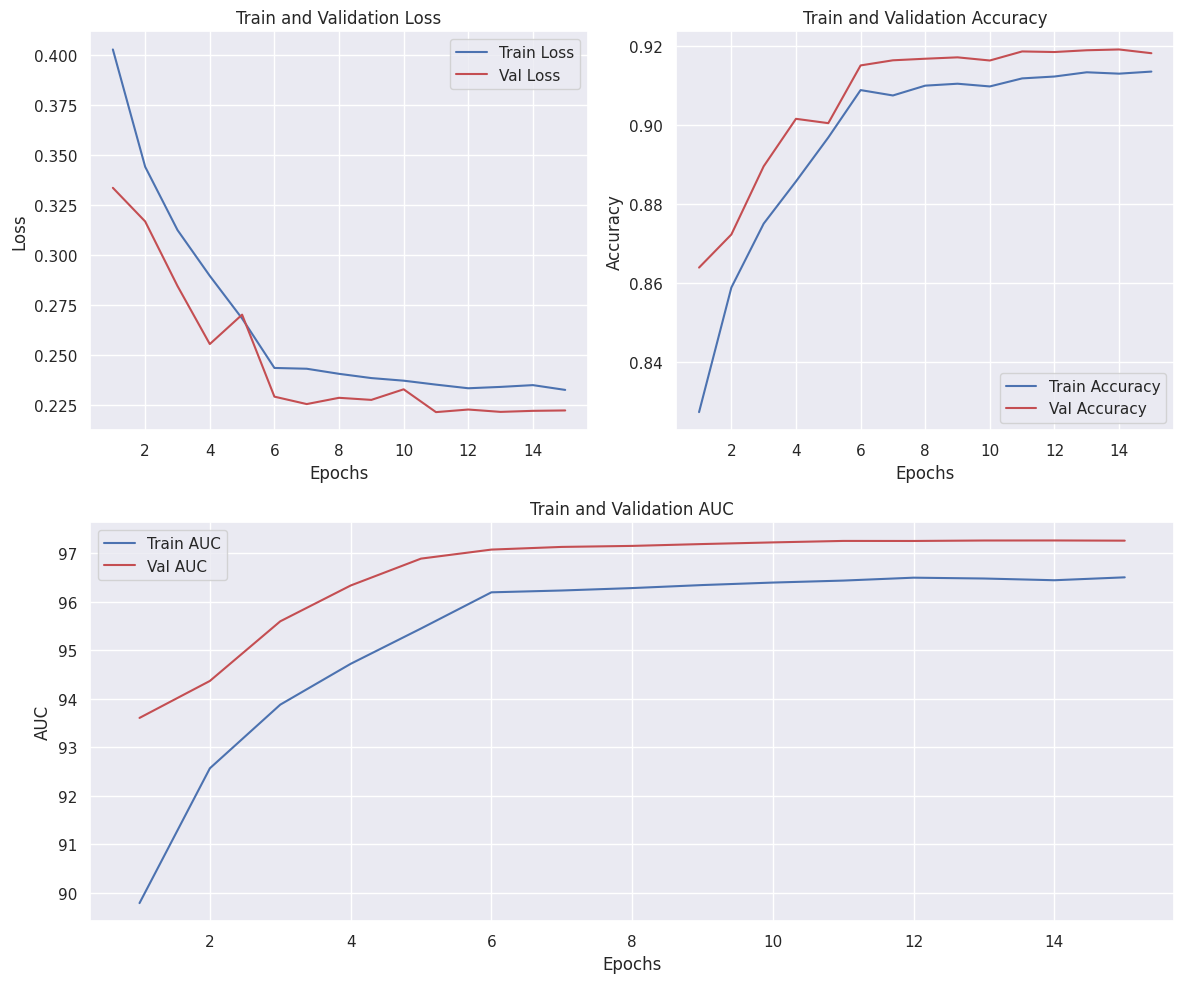

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)